# Sprint7 機械学習 スクラッチ クラスタリング

### BF データセット

In [1]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

### BFインポート

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
print(X)

[[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]
 [ 1.05374379  4.49286859]
 [ 1.59141542  4.90497725]
 [ 0.78260667  4.15263595]
 [-1.95751686  3.87291474]
 [-0.77354537  7.87923564]
 [ 0.12313498  5.27917503]
 [-1.43284669  7.71577043]
 [-0.92819001  7.02698199]
 [-1.74836345  7.06307447]
 [-1.26789718  7.25141327]
 [-0.98661744  7.74968685]
 [-0.81984047  7.50994722]
 [ 2.99684287  0.22378413]
 [ 1.46870582  1.86947425]
 [-0.33533163  3.390122  ]
 [-1.86407034  2.93379754]
 [ 2.62496786  0.28025075]
 [ 2.11114739  3.57660449]
 [-1.8219901   7.61654999]
 [-1.91186205  3.18750686]
 [ 2.28809874  0.12954182]
 [ 0.5285368   4.49723858]
 [-1.57613028  2.58614312]
 [-0.565433    3.65813966]
 [ 0.802314    4.38196181]
 [ 2.79939362  1.84560825]
 [ 2.64465731  0.80770124]
 [ 1.7190373   0.71788708]
 [-0.93564005  7.03443119]
 [ 2.14398059  0.69677319]
 [ 2.06051753  1.79059891]
 [-1.21986433  3.3789856 ]
 [ 1.13280393  3.87673946]
 [-1.497272    8.80022604]
 

## 【問題1】中心点の初期値を決める

### 本当にランダムに中心点きめる

In [6]:
X_center
print(X[:3,:])

[[ 0.72086751  3.71347124]
 [-1.89468423  7.96898545]
 [ 1.35678894  4.36462484]]


In [7]:
#配列の長さを変数に入れる
X_len = len(X)

In [8]:
#シード固定
np.random.seed(9)

In [9]:
#抽出する数をnumに入れる
num = 3

In [31]:
#重複なしでnumの数をXからランダムにインデックス番号取り出す
X_center = np.random.choice(X[:,0], size =num, replace=False)
#直接配列からとりたかったけども、1次元しか指定できなor配列の状態気にせずランダムに
#抽出する方法しか見つけられなかったので、インデックスで取り出す
X_center_index = np.random.choice(X_len, size =num, replace=False)

In [32]:
print(X_center_index)
print(len(new_center_list))

[ 0 29 80]
4


In [12]:
#インデックスを利用して、Xの配列を取り出す
X[X_center_index,:]

array([[ 1.40848818,  3.93270482],
       [-1.57006498,  6.72375844],
       [ 1.61986895,  0.60823883]])

In [14]:
#関数化
def choice_center(X,num):
    X_len = len(X)
    X_center_index = np.random.choice(X_len, size =num, replace=False)
    X_center = X[X_center_index,:]
    return X_center

In [15]:
new_center_list = choice_center(X,4)

In [16]:
print(new_center_list[0])
#print(center_list)

[-1.61803727  8.60696731]


### データを任意の数に分割してその中心(平均)の値を中心点にする

In [6]:
#分けるを変数に入れる
div_num = 4

In [7]:
#a,b,c,d=np.array_split(X, div_num, 0)
a = []
a = np.array_split(X, div_num, 0)

In [8]:
#分割したものの平均取る
#print(a[0])
print(np.mean(a[0],axis = 0))

[-3.83596127e-03  4.74602533e+00]


In [9]:
def choice_center_2 (X,div_num):
    div_list = []
    div_list = np.array_split(X, div_num, 0)
    center_list = []
    
    for i in range(div_num):
        center_list.append(np.mean(div_list[i],axis = 0))
    return div_list,center_list

In [10]:
c,center_list = choice_center_2(X,4)

In [11]:
print(center_list[0])

[-3.83596127e-03  4.74602533e+00]


In [12]:
c,list_ss = choice_center_2(X,4)

## 【問題2】SSEを求める関数の作成

In [37]:
def sse(X,div_num,center):
    sse_x = 0
    for  j in range(X_len):
        for i in range(div_num):
            if class_list[j] == i:
                sse_x += (X[j,:]-v[i])**2
    return sse_x
#rnkの0,1はどのようにクラス化して持たせるのか次第で追加

In [38]:
sse(X,4,center_list)

IndexError: list index out of range

## 【問題3】クラスタへの割り当て

In [129]:
np.linalg.norm((v[0],X[0,:]),ord=2)

6.042435505201955

In [127]:
np.linalg.norm(cccc, ord=2)

1.2614924047197469

In [121]:
cccc = v[0]-X[0,:]

In [122]:
print(cccc)

[-0.72470347  1.0325541 ]


#### ここから

In [26]:
#分ける数を変数に入れる
div_num = 4

In [27]:
#配列の長さを変数に入れる
X_len = len(X)

In [28]:
#Xの配列0行目と中心値の距離を全てだす
#vが中心点
comp_x = []
class_list = []

for j in range(X_len):
    comp_x = []
    for i in range(div_num):
        comp_x.append(np.linalg.norm(v[i]-X[j,:]))   
    class_list .append(np.argmin(comp_x))

NameError: name 'v' is not defined

In [150]:
print(np.argmin(comp_x))
#print(comp_x)
print(class_list)
print(len(class_list))

0
[2, 0, 2, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2, 0, 3, 3, 2, 3, 3, 2, 1, 3, 3, 0, 3, 3, 3, 2, 0, 3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 2, 1, 0, 3, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 1, 3, 3, 0, 0, 3, 0, 0]
100


In [ ]:
#分類したクラスをデータにstack
class_list_re = np.reshape(class_list,[X_len,1])
X_class = np.hstack((X,class_list_re))

## 【問題4】中心点の移動

In [171]:
print(X[X[:,0]==0.72086751])

[]


In [175]:
class_list_re = np.reshape(class_list,[100,1])

In [178]:
X_class = np.hstack((X,class_list_re))
print(X_class.shape)

(100, 3)


In [347]:
X_class[:,:3]

array([[ 0.72086751,  3.71347124,  2.        ],
       [-1.89468423,  7.96898545,  0.        ],
       [ 1.35678894,  4.36462484,  2.        ],
       [ 1.05374379,  4.49286859,  2.        ],
       [ 1.59141542,  4.90497725,  0.        ],
       [ 0.78260667,  4.15263595,  2.        ],
       [-1.95751686,  3.87291474,  3.        ],
       [-0.77354537,  7.87923564,  0.        ],
       [ 0.12313498,  5.27917503,  0.        ],
       [-1.43284669,  7.71577043,  0.        ],
       [-0.92819001,  7.02698199,  0.        ],
       [-1.74836345,  7.06307447,  0.        ],
       [-1.26789718,  7.25141327,  0.        ],
       [-0.98661744,  7.74968685,  0.        ],
       [-0.81984047,  7.50994722,  0.        ],
       [ 2.99684287,  0.22378413,  3.        ],
       [ 1.46870582,  1.86947425,  3.        ],
       [-0.33533163,  3.390122  ,  3.        ],
       [-1.86407034,  2.93379754,  3.        ],
       [ 2.62496786,  0.28025075,  3.        ],
       [ 2.11114739,  3.57660449,  2.   

In [195]:
def move_center (X_class,div_num):
    new_center_list = []
    
    for i in range(div_num):
        new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
    return new_center_list

In [196]:
move_center(X_class,4)

[array([-0.87573496,  7.21520125]),
 array([1.26125481, 2.9175919 ]),
 array([1.03559361, 4.2138299 ]),
 array([0.20435535, 2.04538538])]

## 【問題5】繰り返し

### クラスで実装

In [276]:
class ScratchKMeans_bk():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.X_len = len(X)
        
        
    def _choice_center_2 (self,X):
        #最初の中心点決める
        div_list = []
        div_list = np.array_split(X, self.n_clusters, 0)
        center_list = []
        
        for i in range(self.n_clusters):
            center_list.append(np.mean(div_list[i],axis = 0))
        return center_list    
    
    
    def _class_div(self,X,center_list):
        #クラスに分ける
        comp_x = []
        class_list = []
        
        for j in range(self.X_len):
            comp_x = []
            for i in range(self.n_clusters):
                comp_x.append(np.linalg.norm(center_list[i]-X[j,:]))   
            class_list .append(np.argmin(comp_x))

        #クラスのリストをXデータにつける
        class_list_re = np.reshape(class_list,[self.X_len,1])
        X_class = np.hstack((X,class_list_re))
        return X_class

    def _move_center (self,X_class):
        #中心を動かす
        new_center_list = []
        
        for i in range(self.n_clusters):
            new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
        return new_center_list
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        center_list = self._choice_center_2(X)
        
        for i in range(self.max_iter):
            X_class = self._class_div(X,center_list)
            center_list = self._move_center(X_class)
        return center_list

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """

        pass
        return

#### **↑とりあえず動くものキープ**

In [277]:
SM= ScratchKMeans(n_clusters=4, n_init=1, max_iter=1000, tol=10, verbose=False)

In [278]:
list_ss = SM.fit(X)

In [227]:
print(list_ss)

[array([-1.26811733,  7.76378266]), array([1.99186903, 0.96561071]), array([0.92578447, 4.32475792]), array([-1.47935679,  3.11716896])]


In [219]:
print(new_center_list)

[array([-0.87573496,  7.21520125])]


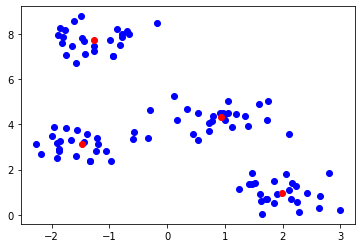

In [380]:
plt.plot(X[:, 0], X[:, 1], 'bo')
plt.plot(list_ss[0][0], list_ss[0][1], 'ro')
plt.plot(list_ss[1][0], list_ss[1][1], 'ro')
plt.plot(list_ss[2][0], list_ss[2][1], 'ro')
plt.plot(list_ss[3][0], list_ss[3][1], 'ro')
plt.show()

In [242]:
comp_center_change = []
for i in range(div_num):
    comp_center_change.append(np.linalg.norm(center_list[i]-new_center_list[i]))   

In [243]:
print(comp_center_change)

[3.8561014884227744, 4.308935405723013, 2.9616313152235945, 1.7112393420745948]


#### 中心点 と重心の差が指定した許容値以下になる。（雛形では引数tol）条件を追加

In [307]:
class ScratchKMeans_r():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.X_len = len(X)
        
        
    def _choice_center_2 (self,X):
        #最初の中心点決める
        div_list = []
        div_list = np.array_split(X, self.n_clusters, 0)
        center_list = []
        
        for i in range(self.n_clusters):
            center_list.append(np.mean(div_list[i],axis = 0))
        return center_list    
    
    def _class_div(self,X,center_list):
        #クラスに分ける
        comp_x = []
        class_list = []
        
        for j in range(self.X_len):
            comp_x = []
            for i in range(self.n_clusters):
                comp_x.append(np.linalg.norm(center_list[i]-X[j,:]))   
            class_list .append(np.argmin(comp_x))

        #クラスのリストをXデータにつける
        class_list_re = np.reshape(class_list,[self.X_len,1])
        X_class = np.hstack((X,class_list_re))
        return X_class
    
    def _move_center (self,X_class,center_list):
        #中心を動かす
        new_center_list = []
        comp_center_change = []
        
        for i in range(self.n_clusters):
            new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
            #前回の中心点と比較
            comp_center_change.append(np.linalg.norm(center_list[i]-new_center_list[i]))   
            #print('comp_center_change',sum(comp_center_change))
            sum_comp_center = sum(comp_center_change)
                            
        return new_center_list,sum_comp_center
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        center_list = self._choice_center_2(X)
        
        for i in range(self.max_iter):
            X_class = self._class_div(X,center_list)
            center_list,sum_comp_center = self._move_center(X_class,center_list)
            #print('self.tol',self.tol)
            print('sum_comp_center',sum_comp_center)    
            print('i',i)
            if sum_comp_center <= self.tol:
                break
        return center_list

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """

        pass
        return

In [312]:
SM_r= ScratchKMeans_r(n_clusters=4, n_init=10, max_iter=10, tol=0, verbose=False)

In [313]:
list_ss = SM_r.fit(X)

sum_comp_center 6.552562280125037
i 0
sum_comp_center 3.1395403747321087
i 1
sum_comp_center 2.147819571759274
i 2
sum_comp_center 0.0
i 3


## 【問題6】異なる初期値で計算

In [325]:
class ScratchKMeans_df():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.X_len = len(X)
    
    def _choice_center(self,X):
        X_center_index = np.random.choice(self.X_len, size =self.n_clusters, replace=False)
        X_center = X[X_center_index,:]
        return X_center
        
    def _choice_center_2 (self,X):
        #最初の中心点決める
        div_list = []
        div_list = np.array_split(X, self.n_clusters, 0)
        center_list = []
        
        for i in range(self.n_clusters):
            center_list.append(np.mean(div_list[i],axis = 0))
        return center_list    
    
    def _class_div(self,X,center_list):
        #クラスに分ける
        comp_x = []
        class_list = []
        
        for j in range(self.X_len):
            comp_x = []
            for i in range(self.n_clusters):
                comp_x.append(np.linalg.norm(center_list[i]-X[j,:]))   
            class_list .append(np.argmin(comp_x))

        #クラスのリストをXデータにつける
        class_list_re = np.reshape(class_list,[self.X_len,1])
        X_class = np.hstack((X,class_list_re))
        return X_class
    
    def _move_center (self,X_class,center_list):
        #中心を動かす
        new_center_list = []
        comp_center_change = []
        
        for i in range(self.n_clusters):
            new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
            #前回の中心点と比較
            comp_center_change.append(np.linalg.norm(center_list[i]-new_center_list[i]))   
            #print('comp_center_change',sum(comp_center_change))
            sum_comp_center = sum(comp_center_change)
                            
        return new_center_list,sum_comp_center
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        center_list = self._choice_center(X)
        
        for i in range(self.max_iter):
            X_class = self._class_div(X,center_list)
            center_list,sum_comp_center = self._move_center(X_class,center_list)
            #print('self.tol',self.tol)
            print('sum_comp_center',sum_comp_center)    
            print('i',i)
            if sum_comp_center <= self.tol:
                break
        return center_list

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """

        pass
        return

In [341]:
SM_df= ScratchKMeans_df(n_clusters=4, n_init=10, max_iter=10, tol=-4, verbose=False)

In [342]:
list_ss = SM_df.fit(X)

sum_comp_center 3.6572626020787773
i 0
sum_comp_center 0.5564354482145144
i 1
sum_comp_center 0.10937876225544216
i 2
sum_comp_center 0.0
i 3
sum_comp_center 0.0
i 4
sum_comp_center 0.0
i 5
sum_comp_center 0.0
i 6
sum_comp_center 0.0
i 7
sum_comp_center 0.0
i 8
sum_comp_center 0.0
i 9


## 【問題7】推定

In [343]:
class ScratchKMeans_pre():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.X_len = len(X)
    
    def _choice_center(self,X):
        X_center_index = np.random.choice(self.X_len, size =self.n_clusters, replace=False)
        X_center = X[X_center_index,:]
        return X_center
        
    def _choice_center_2 (self,X):
        #最初の中心点決める
        div_list = []
        div_list = np.array_split(X, self.n_clusters, 0)
        center_list = []
        
        for i in range(self.n_clusters):
            center_list.append(np.mean(div_list[i],axis = 0))
        return center_list    
    
    def _class_div(self,X,center_list):
        #クラスに分ける
        comp_x = []
        class_list = []
        
        for j in range(self.X_len):
            comp_x = []
            for i in range(self.n_clusters):
                comp_x.append(np.linalg.norm(center_list[i]-X[j,:]))   
            class_list .append(np.argmin(comp_x))

        #クラスのリストをXデータにつける
        class_list_re = np.reshape(class_list,[self.X_len,1])
        X_class = np.hstack((X,class_list_re))
        return X_class
    
    def _move_center (self,X_class,center_list):
        #中心を動かす
        new_center_list = []
        comp_center_change = []
        
        for i in range(self.n_clusters):
            new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
            #前回の中心点と比較
            comp_center_change.append(np.linalg.norm(center_list[i]-new_center_list[i]))   
            #print('comp_center_change',sum(comp_center_change))
            sum_comp_center = sum(comp_center_change)
                            
        return new_center_list,sum_comp_center
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        
        center_list = self._choice_center(X)
        comp_center_first = []

        for k in range(self.n_init):
            center_list = self._choice_center(X)
            for i in range(self.max_iter):
                X_class = self._class_div(X,center_list)
                center_list,sum_comp_center = self._move_center(X_class,center_list)

                print('sum_comp_center',sum_comp_center)    
                print('i',i)
                if sum_comp_center <= self.tol:
                    break
            comp_center_first.append(center_list)
            return center_list

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """

        pass
        return

In [377]:
class ScratchKMeans_pred():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """

    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        self.X_len = len(X)
    
    def _choice_center(self,X):
        X_center_index = np.random.choice(self.X_len, size =self.n_clusters, replace=False)
        X_center = X[X_center_index,:]
        return X_center
        
    def _choice_center_2 (self,X):
        #最初の中心点決める
        div_list = []
        div_list = np.array_split(X, self.n_clusters, 0)
        center_list = []
        
        for i in range(self.n_clusters):
            center_list.append(np.mean(div_list[i],axis = 0))
        return center_list    
    
    def _class_div(self,X,center_list):
        #クラスに分ける
        comp_x = []
        class_list = []
        
        for j in range(self.X_len):
            comp_x = []
            for i in range(self.n_clusters):
                comp_x.append(np.linalg.norm(center_list[i]-X[j,:]))   
            class_list .append(np.argmin(comp_x))

        #クラスのリストをXデータにつける
        class_list_re = np.reshape(class_list,[self.X_len,1])
        X_class = np.hstack((X,class_list_re))
        return X_class
    
    def _move_center (self,X_class,center_list):
        #中心を動かす
        new_center_list = []
        comp_center_change = []
        
        for i in range(self.n_clusters):
            new_center_list.append(np.mean(X_class[:,:2][X_class[:,2] == i],axis = 0))
            #前回の中心点と比較
            comp_center_change.append(np.linalg.norm(center_list[i]-new_center_list[i]))   
            #print('comp_center_change',sum(comp_center_change))
            sum_comp_center = sum(comp_center_change)
                            
        return new_center_list,sum_comp_center
    
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        center_list = self._choice_center(X)
        
        for i in range(self.max_iter):
            X_class = self._class_div(X,center_list)
            center_list,sum_comp_center = self._move_center(X_class,center_list)
            #print('self.tol',self.tol)
            print('sum_comp_center',sum_comp_center)    
            print('i',i)
            if sum_comp_center <= self.tol:
                break
        #self.center_list = center_list
        return center_list,X_class

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        pred = self._class_div(X,self.center_list)

        return pred

In [372]:
SM_pre= ScratchKMeans_pred(n_clusters=4, n_init=1, max_iter=100, tol=-4, verbose=False)

In [ ]:
list_ss,pred = SM_pre.fit(X)

In [374]:
pred = SM_pre.predict(X)

In [381]:
#print(pred)

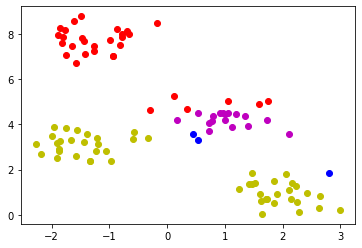

In [379]:
#plt.plot(X[:, 0], X[:, 1], 'bo')
plt.plot(pred[:,0][X_class[:,2] == 0], pred[:,1][X_class[:,2] == 0], 'ro')
plt.plot(pred[:,0][X_class[:,2] == 1], pred[:,1][X_class[:,2] == 1], 'bo')
plt.plot(pred[:,0][X_class[:,2] == 2], pred[:,1][X_class[:,2] == 2], 'mo')
plt.plot(pred[:,0][X_class[:,2] == 3], pred[:,1][X_class[:,2] == 3], 'yo')
plt.show()

## 【問題8】エルボー法の実装

In [14]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

max_cluster_num = 10

sse = np.zeros((max_cluster_num,))     # Sum of Square Error（クラスタ内誤差平方和）
se = np.zeros((max_cluster_num,))      # Sum of Error（クラスタ内誤差和）
inertia = np.zeros((max_cluster_num,)) # scikit-learnにより自動計算するクラスタ内誤差平方和
for i in range(max_cluster_num):
    cluster_num = i + 1
    kmeans = KMeans(n_clusters=cluster_num)
    # 各データがどのクラスタに所属するか
    pred = kmeans.fit_predict(X)
    inertia[i] = kmeans.inertia_

    # 各データが自身の所属するクラスタ中心からどれだけ離れているか調べる
    transforms = kmeans.transform(X)    
    distances = np.zeros((X.shape[0]))
    for index in range(len(transforms)):
        distances[index] = transforms[index,pred[index]]

    se[i] = np.sum(distances)
    sse[i] = np.sum(distances**2)

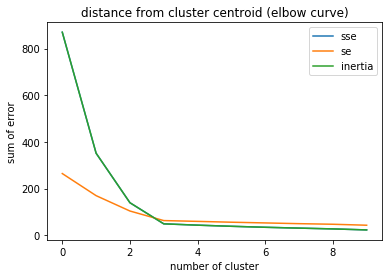

In [15]:

plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
plt.plot(sse,label='sse')
plt.plot(se,label='se')
plt.plot(inertia,label='inertia')
plt.legend()
plt.show()

#### 3か4クラスタに分けるのが良さそう

## 【問題10】クラスタ数kの選択 

In [7]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

path = '/Users/toyodasatomi/Downloads/Wholesale customers data.csv'
data= pd.read_csv(path)

In [17]:
display(data.head())

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [18]:
data = data.drop("Region", axis=1)

In [19]:
data = data.drop("Channel", axis=1)

In [20]:
display(data.head())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


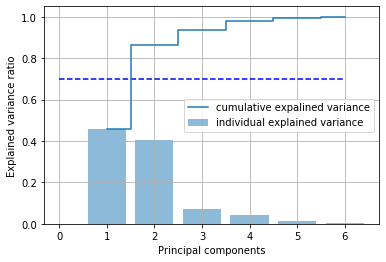

In [22]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

In [10]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

max_cluster_num = 10

sse = np.zeros((max_cluster_num,))     # Sum of Square Error（クラスタ内誤差平方和）
se = np.zeros((max_cluster_num,))      # Sum of Error（クラスタ内誤差和）
inertia = np.zeros((max_cluster_num,)) # scikit-learnにより自動計算するクラスタ内誤差平方和
for i in range(max_cluster_num):
    cluster_num = i + 1
    kmeans = KMeans(n_clusters=cluster_num)
    # 各データがどのクラスタに所属するか
    pred = kmeans.fit_predict(data_pca)
    inertia[i] = kmeans.inertia_

    # 各データが自身の所属するクラスタ中心からどれだけ離れているか調べる
    transforms = kmeans.transform(data_pca)    
    distances = np.zeros((data_pca.shape[0]))
    for index in range(len(transforms)):
        distances[index] = transforms[index,pred[index]]

    se[i] = np.sum(distances)
    sse[i] = np.sum(distances**2)

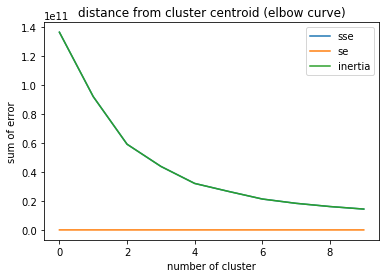

In [27]:
plt.title('distance from cluster centroid (elbow curve)')
plt.xlabel('number of cluster')
plt.ylabel('sum of error')
plt.plot(sse,label='sse')
plt.plot(se,label='se')
plt.plot(inertia,label='inertia')
plt.legend()
plt.show()

#### 4クラスタくらいに分けるのが良さそう

In [11]:
pred = KMeans(n_clusters=4).fit_predict(data_pca)

In [12]:
print(pred)
print(data_pca)

[1 1 1 1 0 1 1 1 1 2 2 1 0 2 0 1 2 1 1 1 1 1 0 2 0 1 1 1 2 0 1 1 1 0 1 2 0
 2 2 0 0 1 2 2 1 2 2 3 1 2 1 1 0 2 0 1 2 2 1 1 1 3 1 2 1 3 1 1 1 1 1 2 1 1
 1 1 1 2 1 1 1 2 2 1 1 3 3 0 1 0 1 1 2 1 2 1 1 1 1 1 2 2 1 0 1 1 2 2 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 2 1 1
 1 0 1 1 1 1 1 2 2 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2 1 2 1 2 0 1 1 1 1 0 2 0 1
 1 1 1 2 2 1 1 1 2 1 1 0 2 1 1 2 2 0 1 1 2 1 1 1 2 1 3 1 1 2 2 2 1 2 1 1 2
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 2 1 1 1 1 1 2 1 0 1 0 1 1 0
 0 1 1 1 1 2 2 2 1 2 1 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 2 1 1
 1 1 1 1 1 2 1 2 2 2 2 1 1 2 1 0 2 1 1 2 1 1 1 2 1 1 1 1 0 0 1 1 1 1 1 2 1
 3 1 0 1 1 1 1 1 2 1 2 1 1 2 0 1 2 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 2 0 1 1 0 1 0 1 2 1 1 1 1 1 1 1 1 0 1 1 2 1 1 1 1 0 0 0 1 1 0
 2 1 1 1 1 2 1 1 1 2 1 2 1 2 1 0 1 1 1 2 0 1 1 2 1 1 1 1 0 0 2 1 1]
[[ 6.50022120e+02  1.58551911e+03]
 [-4.42680498e+03  4.04245152e+03]
 [-4.84199871e+03  2.57876219e+03]
 [

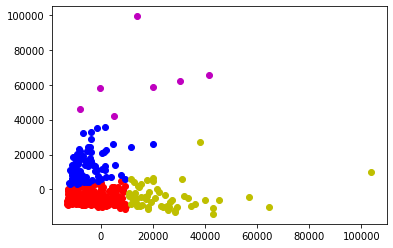

In [35]:
plt.plot(data_pca[:,0][pred == 0], data_pca[:,1][pred == 0], 'ro')
plt.plot(data_pca[:,0][pred == 1], data_pca[:,1][pred == 1], 'bo')
plt.plot(data_pca[:,0][pred == 2], data_pca[:,1][pred == 2], 'mo')
plt.plot(data_pca[:,0][pred == 3], data_pca[:,1][pred == 3], 'yo')
plt.show()

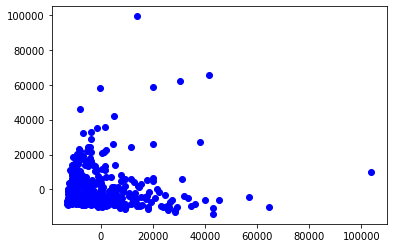

In [32]:
plt.plot(data_pca[:, 0], data_pca[:, 1], 'bo')
plt.show()

## 【問題11】既知のグループとの比較

#### 勉強のためsklearnを利用

In [3]:
path = '/Users/toyodasatomi/Downloads/Wholesale customers data.csv'
all_data= pd.read_csv(path)

In [56]:
#display(all_data)

In [57]:
#all_data.sort_values('Channel')

In [50]:
chan = all_data['Channel']

In [54]:
reg = all_data['Region']

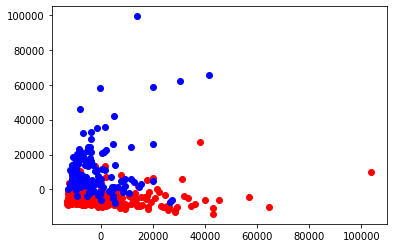

In [53]:
#all_data.plot.scatter(x='xdata', y='ydata')
plt.plot(data_pca[:,0][chan == 1], data_pca[:,1][chan == 1], 'ro')
plt.plot(data_pca[:,0][chan == 2], data_pca[:,1][chan == 2], 'bo')
plt.plot(data_pca[:,0][chan == 3], data_pca[:,1][chan == 3], 'mo')
plt.show()

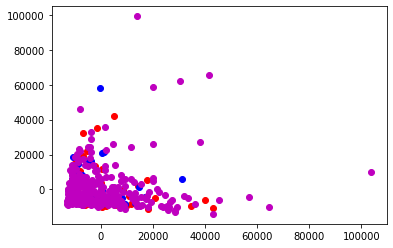

In [55]:
plt.plot(data_pca[:,0][reg == 1], data_pca[:,1][reg == 1], 'ro')
plt.plot(data_pca[:,0][reg == 2], data_pca[:,1][reg == 2], 'bo')
plt.plot(data_pca[:,0][reg == 3], data_pca[:,1][reg == 3], 'mo')
plt.show()

#### RegionとChannelはK-meansを利用したクラスタとは違い、かなり重なりが発生している

## 【問題12】卸売業者にとって有益な情報

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
all_data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


#### もともとの

In [4]:
df_Channel1 = all_data[all_data['Channel']==1].drop(['Channel'],axis=1)
df_Channel2 = all_data[all_data['Channel']==2].drop(['Channel'],axis=1)

In [6]:
df_Region1 = all_data[all_data['Region']==1].drop(['Region'],axis=1)
df_Region2 = all_data[all_data['Region']==2].drop(['Region'],axis=1)
df_Region3 = all_data[all_data['Region']==3].drop(['Region'],axis=1)

#### 新しくクラスらリングしたもの

In [16]:
pred0 = all_data[pred==0].drop(['Region','Channel'],axis=1)
pred1 = all_data[pred==1].drop(['Region','Channel'],axis=1)
pred2 = all_data[pred==2].drop(['Region','Channel'],axis=1)
pred3 = all_data[pred==3].drop(['Region','Channel'],axis=1)

#### それぞれを見てみる

##### Fresh

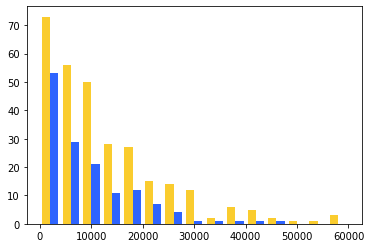

In [18]:
plt.hist([df_Channel1['Fresh'],df_Channel2['Fresh']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

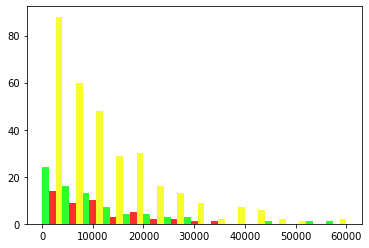

In [19]:
plt.hist([df_Region1['Fresh'],df_Region2['Fresh'],df_Region3['Fresh']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

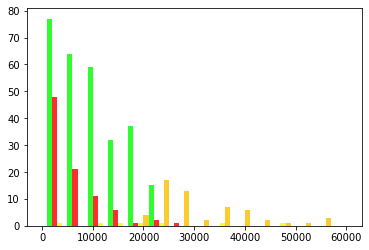

In [21]:
plt.hist([pred0['Fresh'],pred1['Fresh'],pred2['Fresh'],pred3['Fresh']],
         bins=15, label=['Horeca','Lisbon','Oporto','Other Region'], color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

#### Channel,Reagionは特に何も傾向は見えないが、新クラスタの0クラスは額が大きい部分に分布していそう

###### milk

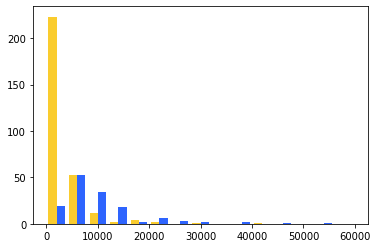

In [24]:
plt.hist([df_Channel1['Milk'],df_Channel2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

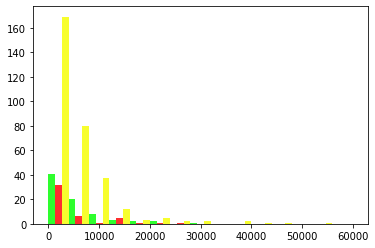

In [23]:
plt.hist([df_Region1['Milk'],df_Region2['Milk'],df_Region3['Milk']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

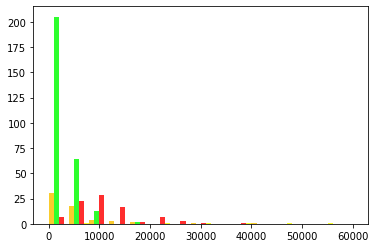

In [25]:
plt.hist([pred0['Milk'],pred1['Milk'],pred2['Milk'],pred3['Milk']],
         bins=15, color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

#### chanel2が価格が高い傾向にある。predが低い傾向がある

##### Grocery

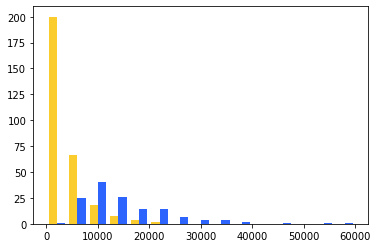

In [41]:
plt.hist([df_Channel1['Grocery'],df_Channel2['Grocery']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

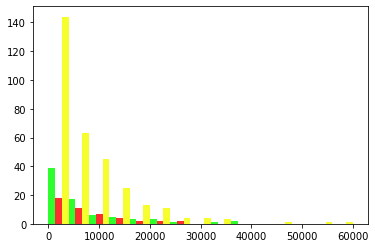

In [42]:
plt.hist([df_Region1['Grocery'],df_Region2['Grocery'],df_Region3['Grocery']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

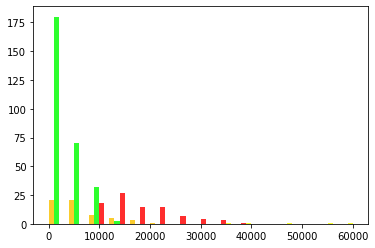

In [43]:
plt.hist([pred0['Grocery'],pred1['Grocery'],pred2['Grocery'],pred3['Grocery']],
         bins=15, color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

#### Channel2,Region3,pred2が価格が大きい傾向

##### Frozen

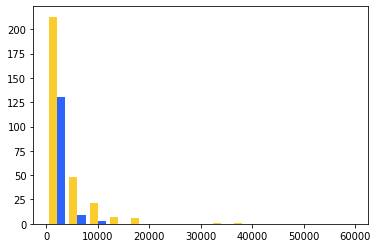

In [44]:
plt.hist([df_Channel1['Frozen'],df_Channel2['Frozen']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

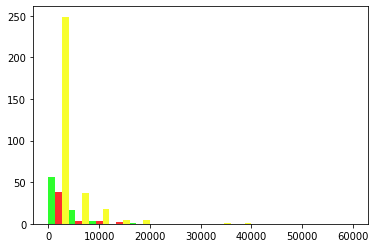

In [45]:
plt.hist([df_Region1['Frozen'],df_Region2['Frozen'],df_Region3['Frozen']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

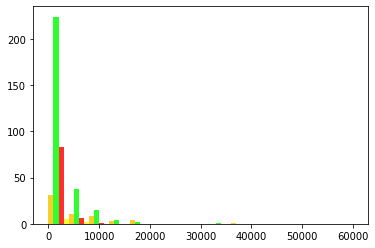

In [46]:
plt.hist([pred0['Frozen'],pred1['Frozen'],pred2['Frozen'],pred3['Frozen']],
         bins=15, color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

#### Channel1が高い傾向、他はあまり傾向なし

##### Detergents_Paper

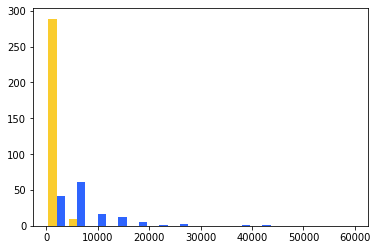

In [47]:
plt.hist([df_Channel1['Detergents_Paper'],df_Channel2['Detergents_Paper']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

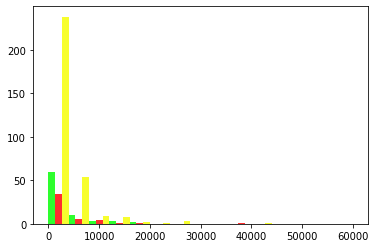

In [48]:
plt.hist([df_Region1['Detergents_Paper'],df_Region2['Detergents_Paper'],df_Region3['Detergents_Paper']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

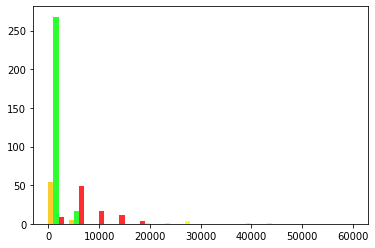

In [49]:
plt.hist([pred0['Detergents_Paper'],pred1['Detergents_Paper'],pred2['Detergents_Paper'],pred3['Detergents_Paper']],
         bins=15, color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

#### 大きな傾向なし

##### Delicatessen

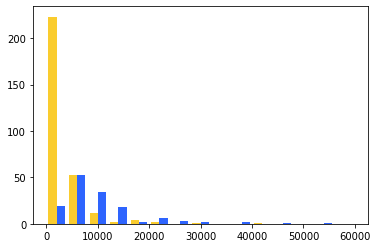

In [38]:
plt.hist([df_Channel1['Milk'],df_Channel2['Milk']],
         bins=15, label=['Horeca','Retail'], color=['#FACC2E','#2E64FE'], range=(0,60000))
plt.show()

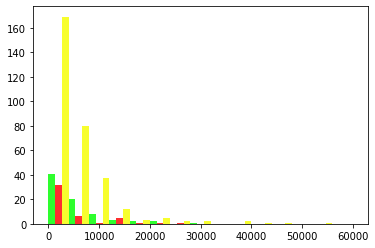

In [39]:
plt.hist([df_Region1['Milk'],df_Region2['Milk'],df_Region3['Milk']],
         bins=15, label=['Lisbon','Oporto','Other Region'], color=['#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

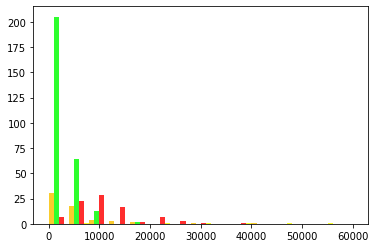

In [40]:
plt.hist([pred0['Milk'],pred1['Milk'],pred2['Milk'],pred3['Milk']],
         bins=15, color=['#FACC2E','#2EFE2E','#FE2E2E','#F7FE2E'], rwidth=100, range=(0,60000))
plt.show()

In [28]:
all_data.groupby(['Region','Channel']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
1      1         761233   228342   237542  184512             56081   
       2          93600   194112   332495   46514            148055   
2      1         326215    64519   123074  160861             13516   
       2         138506   174625   310200   29271            159795   
3      1        2928269   735753   820101  771606            165990   
       2        1032308  1153006  1675150  158886            724420   

                Delicassen  
Region Channel              
1      1             70632  
       2             33695  
2      1             30965  
       2             23541  
3      1            320358  
       2            191752